<a href="https://colab.research.google.com/github/nabilnehme/AAI614_Nehme/blob/main/Week5/AAI614O_Nabil_Nehme_Notebook5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI614: Data Science & its Applications

*Notebook 5.4: Experiment with KNN*


# Example I: Classifying Social Networks Ads

## Importing the libraries

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [100]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

dataset = pd.read_csv('https://raw.githubusercontent.com/harmanani/AAI614/main/Week%205/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [101]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


## Splitting the dataset into the Training set and Test set

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


## Feature Scaling

In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Fitting K-NN to the Training set

Use the KNN model for training by specifying the input and output variables of the training set as follows.  Note that *p =2* refers to **euclidean distance**.

In [104]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [105]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [106]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

# Example II: Classifying Digits

In [107]:
from sklearn import metrics

In [108]:
from sklearn.datasets import load_digits
digits = load_digits()
# Train the model using the training sets
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [109]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [110]:
#Predict Output
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model.predict(x_test))
score = model.score(x_test, y_test)

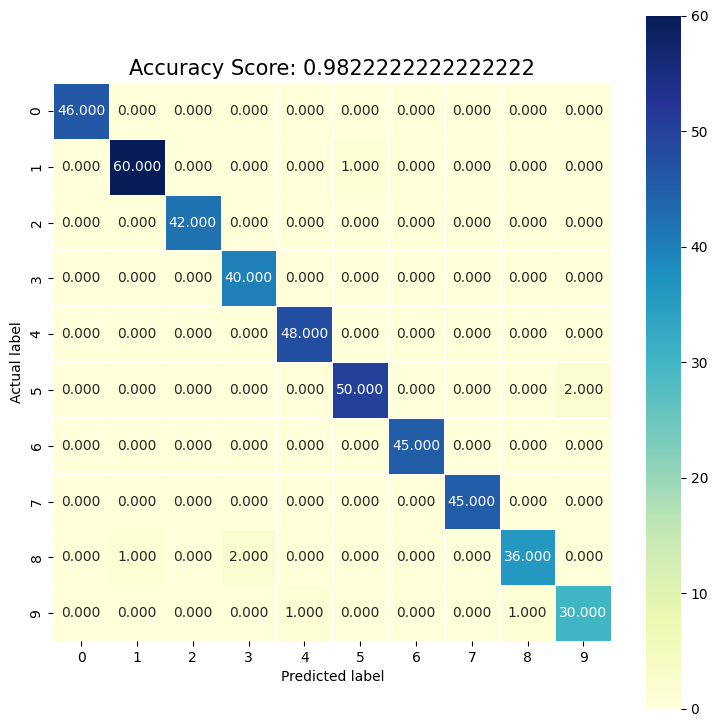

In [111]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5,square = True, cmap = 'YlGnBu')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

#Example III

In [112]:
from sklearn.datasets import load_wine
X_wine, y_wine = load_wine(return_X_y=True)

In [114]:
from sklearn.model_selection import train_test_split
X_Wine_train, X_Wine_test, y_Wine_train, y_Wine_test = train_test_split(X_wine, y_wine, test_size = 0.25, random_state = 0)

In [125]:
print(y_Wine_test)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [115]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_Wine_train = sc.fit_transform(X_Wine_train)
X_Wine_test = sc.transform(X_Wine_test)

In [116]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_Wine_train, y_Wine_train)

KNeighborsClassifier()

In [117]:
y_Wine_pred = classifier.predict(X_Wine_test)

In [118]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_Wine_test, y_Wine_pred)
cm

array([[16,  0,  0],
       [ 0, 20,  1],
       [ 0,  0,  8]])

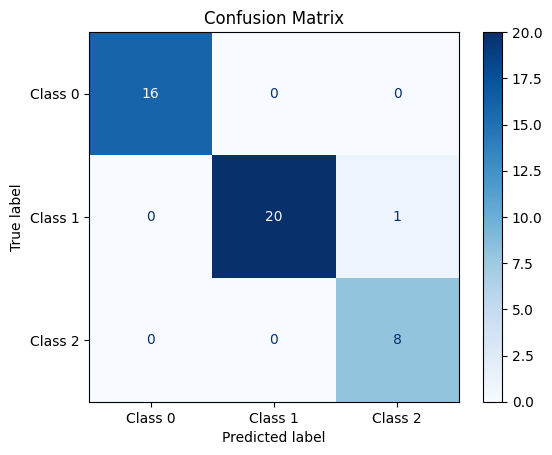

In [127]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1", "Class 2"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
